# 1.0 CitiBike Viz

* add elevation https://developers.google.com/maps/documentation/elevation/start
* visualize using ipyleaflet
* time vs station depart/arrive
* age vs station depart/arrive
* ave vs time depart/arrive
* station-station distances and google maps biking distances
* add neighborhood categories to stations

In [1]:
from clustergrammer2 import net
df = {}

In [116]:
import himc_helper_functions_v0_12_3 as hf
import datetime

In [2]:
import pandas as pd
from copy import deepcopy
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [18]:
df_ini = pd.read_csv('../data/big_data/201901-citibike-tripdata.csv')
df_ini.shape

(967287, 15)

In [119]:
now = datetime.datetime.now()
inst_year = now.year
inst_year

2020

In [19]:
df_ini.columns.tolist()

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

In [44]:
for inst_station in all_stations:
    if '&' not in inst_station:
        print(inst_station)

10 Hudson Yards
58th St Depot
Cherry St
Great Jones St
NYCBS DEPOT - DELANCEY
NYCBS Depot - GOW
Old Fulton St
Pershing Square North
Pershing Square South
Pier 40 - Hudson River Park
Washington Park
Water - Whitehall Plaza
West Thames St


### Station Categories

In [106]:
df_meta = pd.DataFrame(all_stations, index=all_stations, columns=['station crossing'])
for inst_point in ['start', 'end']:
    
    # x 
    df_meta['cross-y'] = df_meta['station crossing'].apply(lambda x: str(x).split(' & ')[0] if '&' in str(x) else x)
    
    # y 
    df_meta['cross-x'] = df_meta['station crossing'].apply(lambda x: str(x).split(' & ')[1] if '&' in str(x) else x)
    
    # Street
    ser_st = pd.Series(index=df_meta['cross-y'].index.tolist())
    ser_ave = pd.Series(index=df_meta['cross-y'].index.tolist())
    
    # Find Street and Avenue
    for inst_row in ser_st.index.tolist():
        inst_st = 'N.A.'
        inst_ave = 'N.A.'
        
        # Find street
        if ' St' in df_meta.loc[inst_row, 'cross-y']:
            inst_st = df_meta.loc[inst_row, 'cross-y']
        elif ' St' in df_meta.loc[inst_row, 'cross-x']:
            inst_st = df_meta.loc[inst_row, 'cross-x']
            
        # Find Avenue
        if ' Ave' in df_meta.loc[inst_row, 'cross-y']:
            inst_ave = df_meta.loc[inst_row, 'cross-y']
        elif ' Ave' in df_meta.loc[inst_row, 'cross-x']:
            inst_ave = df_meta.loc[inst_row, 'cross-x']
        
        ser_st[inst_row] = inst_st
        ser_ave[inst_row] = inst_ave

df_meta['St'] = ser_st
df_meta['Ave'] = ser_ave

### Calc Destination Distributions
Save positions of stations

In [ ]:
all_stations = sorted(df_ini['start station name'].value_counts().index.tolist())
len(all_stations)

df_dest = pd.DataFrame(0, index=all_stations, columns=all_stations)
for inst_station in all_stations:
    inst_df = df_ini.loc[df_ini['start station name'] == inst_station]
    ser_destination = inst_df['end station name'].value_counts()
    ser_destination.name = inst_station
    
    df_dest[inst_station] = ser_destination
    
    df_meta.loc[inst_station, 'start station latitude'] = inst_df['start station latitude'].mean()
    df_meta.loc[inst_station, 'start station longitude'] = inst_df['start station longitude'].mean()    
    
    # save average departing age
    df_meta.loc[inst_station, 'departing age'] = inst_year - inst_df['birth year'].mean()
    
    inst_df = df_ini.loc[df_ini['end station name'] == inst_station]    
    df_meta.loc[inst_station, 'arriving age'] = inst_year - inst_df['birth year'].mean()    
    
df_dest.shape

In [59]:
df_dest = df_dest.fillna(0)
df_dest.shape

(767, 767)

In [64]:
df_cat = deepcopy(df_dest)
add_cat_list = ['street-x', 'street-y']
new_cols = hf.add_cats_from_meta(add_cat_list=add_cat_list, barcodes=df_cat.columns.tolist(), df_meta=df_meta)

add_cat_list = ['street-x', 'street-y']
new_rows = hf.add_cats_from_meta(add_cat_list=add_cat_list, barcodes=df_cat.index.tolist(), df_meta=df_meta)

df_cat.columns = new_cols
df_cat.index = new_rows

In [67]:
df_norm = net.umi_norm(df_cat)

In [68]:
net.load_df(df_norm)
net.normalize(axis='row', norm_type='zscore')
net.clip(-5,5)
net.widget()

ExampleWidget(network='{"row_nodes": [{"name": "1 Ave & E 110 St", "ini": 767, "clust": 404, "rank": 98, "rank…

In [6]:
cols = df['ini'].columns.tolist()
new_cols = ['T-'+ str(x) for x in cols]
rows = df['ini'].index.tolist()
mat = df['ini'].get_values()
df['ct-ini'] = pd.DataFrame(data=mat, columns=new_cols, index=rows)

In [7]:
df['ct-ini'].head(20)

,T-0,T-1,T-2,T-3,T-4,T-5,T-6,T-7,T-8,T-9,...,T-967277,T-967278,T-967279,T-967280,T-967281,T-967282,T-967283,T-967284,T-967285,T-967286
tripduration,320,316,591,2719,303,535,280,1547,300,123,...,389,703,245,2535,233,291,437,173,244,387
starttime,2019-01-01 00:01:47.4010,2019-01-01 00:04:43.7360,2019-01-01 00:06:03.9970,2019-01-01 00:07:03.5450,2019-01-01 00:07:35.9450,2019-01-01 00:08:33.1790,2019-01-01 00:09:21.0060,2019-01-01 00:11:22.9070,2019-01-01 00:12:17.9310,2019-01-01 00:12:19.6030,...,2019-01-31 23:58:43.6290,2019-01-31 23:59:12.5210,2019-01-31 23:59:31.6600,2019-01-31 23:59:36.7480,2019-01-31 16:37:28.0680,2019-01-31 17:33:26.4490,2019-01-31 18:57:45.3380,2019-01-31 19:11:41.1930,2019-01-31 20:54:51.1440,2019-01-31 23:38:42.1770
stoptime,2019-01-01 00:07:07.5810,2019-01-01 00:10:00.6080,2019-01-01 00:15:55.4380,2019-01-01 00:52:22.6500,2019-01-01 00:12:39.5020,2019-01-01 00:17:28.3540,2019-01-01 00:14:01.1510,2019-01-01 00:37:10.0550,2019-01-01 00:17:18.8300,2019-01-01 00:14:23.1040,...,2019-02-01 00:05:13.5620,2019-02-01 00:10:55.5860,2019-02-01 00:03:37.2060,2019-02-01 00:41:51.9970,2019-01-31 16:41:21.7320,2019-01-31 17:38:17.8940,2019-01-31 19:05:02.4970,2019-01-31 19:14:34.3350,2019-01-31 20:58:55.3100,2019-01-31 23:45:09.4520
start station id,3160,519,3171,504,229,3630,3675,285,3394,432,...,3226,470,3418,3350,3354,3354,3354,3354,3354,3354
start station name,Central Park West & W 76 St,Pershing Square North,Amsterdam Ave & W 82 St,1 Ave & E 16 St,Great Jones St,Frederick Douglass Blvd & W 115 St,3 Ave & E 95 St,Broadway & E 14 St,Columbia St & W 9 St,E 7 St & Avenue A,...,W 82 St & Central Park West,W 20 St & 8 Ave,Plaza St West & Flatbush Ave,W 100 St & Broadway,3 St & Prospect Park West,3 St & Prospect Park West,3 St & Prospect Park West,3 St & Prospect Park West,3 St & Prospect Park West,3 St & Prospect Park West
start station latitude,40.779,40.7519,40.7852,40.7322,40.7274,40.8039,40.7846,40.7345,40.677,40.7262,...,40.7828,40.7435,40.675,40.7974,40.6681,40.6681,40.6681,40.6681,40.6681,40.6681
start station longitude,-73.9737,-73.9777,-73.9767,-73.9817,-73.9938,-73.9559,-73.9497,-73.9907,-74.0065,-73.9838,...,-73.9714,-74,-73.9711,-73.9704,-73.9736,-73.9736,-73.9736,-73.9736,-73.9736,-73.9736
end station id,3283,518,3154,3709,503,3529,3288,3358,3398,3656,...,3145,127,3354,327,3304,3423,3313,3418,3346,3549
end station name,W 89 St & Columbus Ave,E 39 St & 2 Ave,E 77 St & 3 Ave,W 15 St & 6 Ave,E 20 St & Park Ave,Lenox Ave & W 130 St,E 88 St & 1 Ave,Garfield Pl & 8 Ave,Smith St & 9 St,E 2 St & Avenue A,...,E 84 St & Park Ave,Barrow St & Hudson St,3 St & Prospect Park West,Vesey Pl & River Terrace,6 Ave & 9 St,West Drive & Prospect Park West,6 Ave & 12 St,Plaza St West & Flatbush Ave,Berkeley Pl & 7 Ave,Grand Ave & Bergen St
end station latitude,40.7882,40.7478,40.7731,40.738,40.7383,40.8108,40.7783,40.6712,40.6747,40.7231,...,40.7786,40.7317,40.6681,40.7153,40.6681,40.6611,40.6663,40.675,40.6751,40.678


In [8]:
start_name = df['ct-ini'].loc['start station name']
end_name = df['ct-ini'].loc['end station name']
bike_id = df['ct-ini'].loc['bikeid']
ser_gender = df['ct-ini'].loc['gender']

In [9]:
keep_rows = [x for x in rows if 'time' not in x and 'name' not in x and 
             'usertype' not in x and 'station id' not in x and 'bikeid' not in x and
            'gender' not in x]

In [10]:
df['ct'] = df['ct-ini'].loc[keep_rows]
df['ct']

,T-0,T-1,T-2,T-3,T-4,T-5,T-6,T-7,T-8,T-9,...,T-967277,T-967278,T-967279,T-967280,T-967281,T-967282,T-967283,T-967284,T-967285,T-967286
tripduration,320,316,591,2719,303,535,280,1547,300,123,...,389,703,245,2535,233,291,437,173,244,387
start station latitude,40.779,40.7519,40.7852,40.7322,40.7274,40.8039,40.7846,40.7345,40.677,40.7262,...,40.7828,40.7435,40.675,40.7974,40.6681,40.6681,40.6681,40.6681,40.6681,40.6681
start station longitude,-73.9737,-73.9777,-73.9767,-73.9817,-73.9938,-73.9559,-73.9497,-73.9907,-74.0065,-73.9838,...,-73.9714,-74,-73.9711,-73.9704,-73.9736,-73.9736,-73.9736,-73.9736,-73.9736,-73.9736
end station latitude,40.7882,40.7478,40.7731,40.738,40.7383,40.8108,40.7783,40.6712,40.6747,40.7231,...,40.7786,40.7317,40.6681,40.7153,40.6681,40.6611,40.6663,40.675,40.6751,40.678
end station longitude,-73.9704,-73.9734,-73.9586,-73.9964,-73.9875,-73.9431,-73.9488,-73.9748,-73.9979,-73.9858,...,-73.9577,-74.0067,-73.9736,-74.0166,-73.9838,-73.9795,-73.9855,-73.9711,-73.9752,-73.9624
birth year,1971,1964,1987,1990,1979,1989,1987,1981,1990,1987,...,1960,1960,1984,1951,1979,1978,1976,1977,1994,1979


In [11]:
df['ct'] = df['ct'].astype('float')

In [12]:
ser_dur = df['ct'].loc['tripduration']
df['ct-clean'] = deepcopy(df['ct'])
ser_dur = np.arcsinh(ser_dur/5)
df['ct-clean'].loc['tripduration'] = ser_dur

### Add Station Names

In [13]:
gender_key = {}
gender_key[0] = 'Unknown'
gender_key[1] = 'Male'
gender_key[2] = 'Female'

In [14]:
df['ct-clean'].columns.tolist()[0]

'T-0'

In [15]:
df['ct-cat'] = deepcopy(df['ct-clean'])
cols = df['ct-cat'].columns.tolist()
new_cols = [(x, 'Start: ' + str(start_name[x]), 
                'End: ' + str(end_name[x]), 
                'Bike: ' + str(bike_id[x]),
                'Gender: ' + gender_key[ser_gender[x]]) for x in cols]
df['ct-cat'].columns = new_cols

In [16]:
df['ct-cat'].head()

,"(T-0, Start: Central Park West & W 76 St, End: W 89 St & Columbus Ave, Bike: 15839, Gender: Male)","(T-1, Start: Pershing Square North, End: E 39 St & 2 Ave, Bike: 32723, Gender: Male)","(T-2, Start: Amsterdam Ave & W 82 St, End: E 77 St & 3 Ave, Bike: 27451, Gender: Male)","(T-3, Start: 1 Ave & E 16 St, End: W 15 St & 6 Ave, Bike: 21579, Gender: Male)","(T-4, Start: Great Jones St, End: E 20 St & Park Ave, Bike: 35379, Gender: Male)","(T-5, Start: Frederick Douglass Blvd & W 115 St, End: Lenox Ave & W 130 St, Bike: 30315, Gender: Female)","(T-6, Start: 3 Ave & E 95 St, End: E 88 St & 1 Ave, Bike: 35391, Gender: Male)","(T-7, Start: Broadway & E 14 St, End: Garfield Pl & 8 Ave, Bike: 35551, Gender: Male)","(T-8, Start: Columbia St & W 9 St, End: Smith St & 9 St, Bike: 18636, Gender: Female)","(T-9, Start: E 7 St & Avenue A, End: E 2 St & Avenue A, Bike: 35206, Gender: Male)",...,"(T-967277, Start: W 82 St & Central Park West, End: E 84 St & Park Ave, Bike: 34846, Gender: Male)","(T-967278, Start: W 20 St & 8 Ave, End: Barrow St & Hudson St, Bike: 32666, Gender: Male)","(T-967279, Start: Plaza St West & Flatbush Ave, End: 3 St & Prospect Park West, Bike: 28520, Gender: Female)","(T-967280, Start: W 100 St & Broadway, End: Vesey Pl & River Terrace, Bike: 30289, Gender: Male)","(T-967281, Start: 3 St & Prospect Park West, End: 6 Ave & 9 St, Bike: 32347, Gender: Male)","(T-967282, Start: 3 St & Prospect Park West, End: West Drive & Prospect Park West, Bike: 19780, Gender: Female)","(T-967283, Start: 3 St & Prospect Park West, End: 6 Ave & 12 St, Bike: 34365, Gender: Female)","(T-967284, Start: 3 St & Prospect Park West, End: Plaza St West & Flatbush Ave, Bike: 25889, Gender: Male)","(T-967285, Start: 3 St & Prospect Park West, End: Berkeley Pl & 7 Ave, Bike: 34649, Gender: Male)","(T-967286, Start: 3 St & Prospect Park West, End: Grand Ave & Bergen St, Bike: 17299, Gender: Male)"
tripduration,4.852091,4.839514,5.465543,6.991730,4.797510,5.365998,4.718579,6.427785,4.787561,3.896306,...,5.047330,5.639079,4.585072,6.921659,4.534863,4.757106,5.163675,4.237210,4.580982,5.042176
start station latitude,40.778968,40.751873,40.785247,40.732219,40.727434,40.803865,40.784597,40.734546,40.676999,40.726218,...,40.782750,40.743453,40.675021,40.797372,40.668132,40.668132,40.668132,40.668132,40.668132,40.668132
start station longitude,-73.973747,-73.977706,-73.976673,-73.981656,-73.993790,-73.955931,-73.949685,-73.990741,-74.006471,-73.983799,...,-73.971370,-74.000040,-73.971115,-73.970412,-73.973638,-73.973638,-73.973638,-73.973638,-73.973638,-73.973638
end station latitude,40.788221,40.747804,40.773142,40.738046,40.738274,40.810792,40.778301,40.671198,40.674696,40.723077,...,40.778627,40.731724,40.668132,40.715338,40.668127,40.661063,40.666318,40.675021,40.675147,40.678045
end station longitude,-73.970416,-73.973442,-73.958562,-73.996430,-73.987520,-73.943068,-73.948813,-73.974841,-73.997858,-73.985836,...,-73.957721,-74.006744,-73.973638,-74.016584,-73.983776,-73.979453,-73.985462,-73.971115,-73.975232,-73.962408


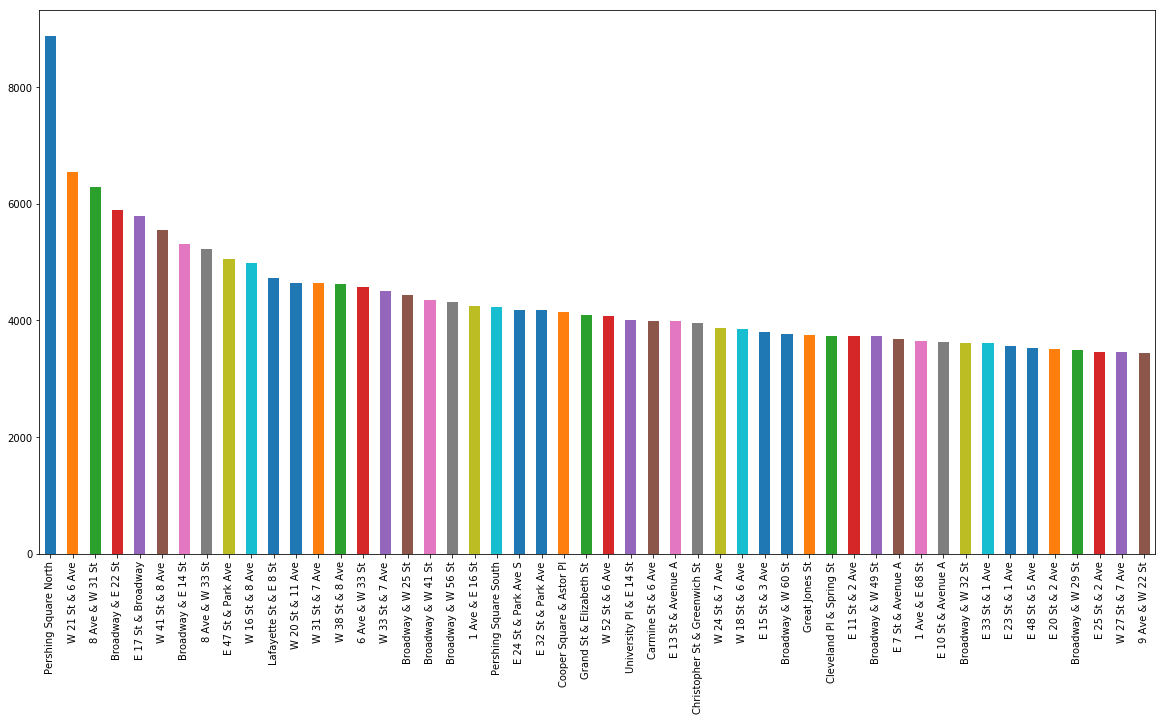

In [17]:
start_ser = list(start_name.get_values())
start_ser = pd.Series(start_ser).value_counts().head(50)
start_ser.plot('bar', figsize=(20, 10))

In [18]:
start_ser

Pershing Square North            8874
W 21 St & 6 Ave                  6542
8 Ave & W 31 St                  6291
Broadway & E 22 St               5896
E 17 St & Broadway               5786
W 41 St & 8 Ave                  5539
Broadway & E 14 St               5300
8 Ave & W 33 St                  5214
E 47 St & Park Ave               5052
W 16 St & 8 Ave                  4985
Lafayette St & E 8 St            4719
W 20 St & 11 Ave                 4640
W 31 St & 7 Ave                  4634
W 38 St & 8 Ave                  4614
6 Ave & W 33 St                  4575
W 33 St & 7 Ave                  4497
Broadway & W 25 St               4425
Broadway & W 41 St               4351
Broadway & W 56 St               4317
1 Ave & E 16 St                  4236
Pershing Square South            4234
E 24 St & Park Ave S             4181
E 32 St & Park Ave               4174
Cooper Square & Astor Pl         4145
Grand St & Elizabeth St          4083
W 52 St & 6 Ave                  4068
University P

### Randomly Sample

In [19]:
net.load_df(df['ct-cat'])
net.random_sample(axis='col', num_samples=1000, random_state=99)
net.normalize(axis='row', norm_type='zscore')
net.clip(-5, 5)
net.widget()

ExampleWidget(network='{"row_nodes": [{"name": "tripduration", "ini": 6, "clust": 4, "rank": 0, "rankvar": 0, …

In [21]:
# net.load_df(df['ct-clean'])
# net.swap_nan_for_zero()
# net.downsample(axis='col', ds_type='kmeans', num_samples=1000, random_state=99)
# net.normalize(axis='row', norm_type='zscore')
# net.clip(-5, 5)
# net.widget()

# Filter for top station

In [22]:
cols = df['ct-cat'].columns.tolist()
keep_cols = [x for x in cols if 'Pershing Square North' in x[1]]
len(keep_cols)

8874

In [23]:
net.load_df(df['ct-cat'][keep_cols])
net.normalize(axis='row', norm_type='zscore')
net.clip(-5, 5)
net.widget()

ExampleWidget(network='{"row_nodes": [{"name": "tripduration", "ini": 6, "clust": 3, "rank": 2, "rankvar": 2, …